# TP2 - Matrices et Applications

#### Les objectifs de ce second TP sont de se familiariser avec
 - la manipulation des matrices de "manière ludique" (partie 1)
 - la notion d'erreur lors de la résolution numérique des systèmes linéaires (partie 2)
 
#### Méthodologie
 - exécuter les cellules pour comprendre ce qui est programmé et comment
 - répondre aux questions en refaisant par vous-même

# 1 - Matrices et Images

On considère l'image ci-dessous en niveaux de gris ("greyscale" en anglais).
L'objectif de cette première partie est de travailler sur cette image en la considérant comme une matrice.

In [2]:
# Importation de la librairie "numpy"
import numpy as np
# Importation du module "pyplot" de la librairie "matplotlib"
import matplotlib.pyplot as plt

In [4]:
# Importation de l'image : fichier "sam.csv" dans la variable A
# ATTENTION : le fichier "sam.csv" doit être enregistré au même endroit que ce notebook 
A = np.loadtxt("sam.csv", delimiter="\t", dtype=int)

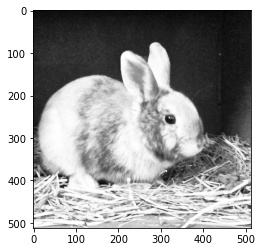

In [5]:
# Affichage de l'image : variable A en niveaux de gris
fig, ax = plt.subplots()
ax.imshow(A, cmap="Greys_r")

## 1.1 - Structure de la variable $A$

L'image du lapin "Sam" est en fait l'affichage de valeurs contenues dans un tableau. Chaque pixel correspond à une case du tableau et est codé par un entier entre 0 et 255 qui correspond à un niveau de gris (0 pour le noir et 255 pour le blanc). Cette image, composée de $m\times n$ (ici $m=n=512$) pixels, est donc représentée par 
un tableau d'entiers avec $m$ lignes et $n$ colonnes, c'est à dire une matrice $m\times n$ dont les coefficients sont donc des entiers compris entre 0 et 255.

L'exécution des cellules ci-dessous va vous permettre de vérifier ceci et de bien comprendre cette structure.
##### NB Vous pouvez aussi afficher cette variable...

In [6]:
m,n =A.shape
print("La matrice A est de taille {}x{}".format(m,n))

La matrice A est de taille 512x512


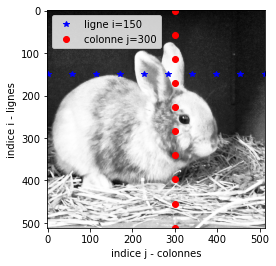

In [7]:
# Construction des vecteurs d'abscisses x_L150 et d'ordonnées y_L150
# pour représenter avec 10 points la ligne i=150 (L150) de la matrice A sur l'image 
nombre_points=10
x_L150=np.linspace(1,n-1,nombre_points)
y_L150=150*np.ones(nombre_points)
# Remarque : vous pouvez afficher ces vecteurs pour comprendre ce qu'ils contiennent
#
# pour représenter la colonne j=300 de la matrice A sur l'image
x_C300=300*np.ones(nombre_points)
y_C300=np.linspace(1,m-1,nombre_points)
#
# Visualisation de Sam et correspondance visuelle avec
# - la ligne 150 de la matrice A 
# - la colonne 300 de la matrice A
fig, ax = plt.subplots()
ax.imshow(A, cmap="Greys_r")
ax.plot(x_L150,y_L150,'b*', label='ligne i=150')
ax.plot(x_C300,y_C300,'ro', label='colonne j=300')
plt.xlabel('indice j - colonnes')
plt.ylabel('indice i - lignes')
plt.legend();

#### Question 1
Exécuter la cellule ci-dessous et identifier ce qui a été modifié sur l'image de Sam grace aux modifications effectuées sur la matrice.

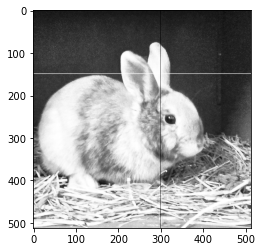

In [8]:
# Construction d'une nouvelle matrice B identique à la matrice A
# pour travailler sans modifier l'image originale de Sam (matrice A)
B=A.copy()
# Modifications de la matrice
B[149,:] = 255  #colonne black
B[:,299] = 0  #ligne blanc
# Affichage de l'image modifiée : matrice B en niveau de gris
fig, ax = plt.subplots()
ax.imshow(B, cmap="Greys_r")

#### Question 2
Exécuter les deux cellules ci-dessous afin de comprendre et d'identifier ce qui a été modifié sur l'image de Sam grace aux opérations effectuées sur la matrice. Pourquoi voit-on maintenant Sam en noir et blanc ? 

In [9]:
# La commande '//' sert à faire une division entière.
# par exemple : 
a = 155
b = 100
q = a // b
print("La division entière de {} par {} est {}\n".format(a,b,q))
print("La valeur maximale contenue dans la matrice A est {}".format(np.max(A)))
print("La division entière cette valeur maximale par 100 est {}".format(np.max(A)//100))

La division entière de 155 par 100 est 1

La valeur maximale contenue dans la matrice A est 255
La division entière cette valeur maximale par 100 est 2


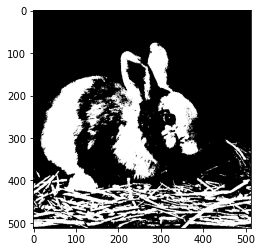

In [10]:
C = A // 200
fig, ax = plt.subplots()
ax.imshow(C, cmap="Greys_r")

In [ ]:
# Because the only possible results are only 0 or 1. Le resultats de la division nous donne le nombre de gris possibles

#### Question 3
Afficher l'image de Sam avec un nombre de niveaux de gris variable.

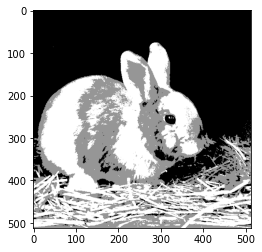

In [19]:
### A VOUS DE FAIRE ####
nombre_de_gris = 100

D = A // nombre_de_gris
fig, ax = plt.subplots()
ax.imshow(D, cmap="Greys_r")



## 1.2 - Transformations de l'image de Sam 
On se propose maintenant d'effectuer des manipulations sur les lignes et les colonnes de la matrice $A$ et d'en observer les conséquences sur l'image de Sam. 

#### Question 4
Exécuter la cellule ci-dessous pour 
 - déterminer la manipulation effectuée sur la matrice A 
 - comprendre la transformation correspondante sur l'image de Sam

##### NB vous pourrez aussi afficher l'image originale de Sam pour comparer ...

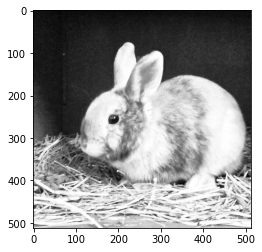

In [12]:
# Transformation 1 : 
# Construction d'une matrice M1 à partir de la matrice d'origine A
# M1 de même taille que A pour commencer, et ne contenant que des zéros
M1 = np.zeros_like(A)
# Manipulation sur A pour construire M1
for j in range(n):
    M1[:,j]=A[:,n-1-j]
# Affichage de l'image correspondant à la matrice M1     
fig, ax = plt.subplots()
ax.imshow(M1, cmap="Greys_r")

In [ ]:
# Image a été renversé autour des colonnes
#Les colonnes ont étaient renversé

#### Question 5
Exécuter la cellule ci-dessous pour 
 - déterminer la manipulation effectuée sur la matrice A 
 - comprendre la transformation correspondante sur l'image de Sam

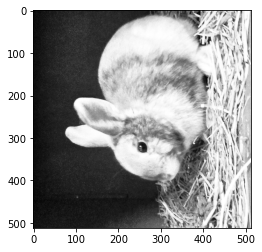

In [31]:
# Transformation 2 : 
M2 = A.T
fig, ax = plt.subplots()
ax.imshow(M2, cmap="Greys_r")

In [ ]:
# Transposé de A inversé

#### Question 6
Trouver une (ou plusieurs) manipulation(s) matricielle(s) sur la matrice $A$ afin de réaliser chacune des transformations de Sam suivantes:
- une rotation de 90 degrés dans le sens des aiguilles d'une montre 
- une rotation de 180 degrés dans le sens des aiguilles d'une montre 
- une rotation de 270 degrés dans le sens des aiguilles d'une montre 

puis tester ces manipulation en affichant l'image transformée correspondante.
##### NB Prenez une feuille et un crayon, ça vous aidera ... !

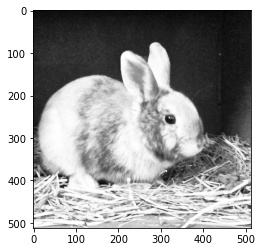

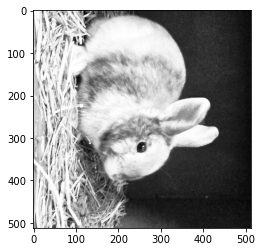

In [29]:
# Affichage de l'image : variable A en niveaux de gris
fig, ax = plt.subplots()
ax.imshow(A, cmap="Greys_r")

# Transformation 2 : 
M2 = A.T

M3 = np.zeros_like(M2)
# Manipulation sur A pour construire M1
for j in range(n):
    M3[:,j]=M2[:,n-1-j]
# Affichage de l'image correspondant à la matrice M1     
fig, ax = plt.subplots()
ax.imshow(M3, cmap="Greys_r")

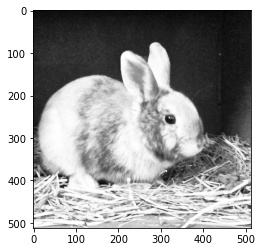

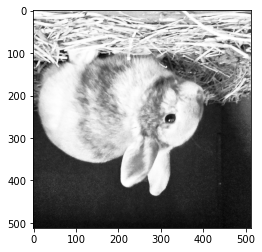

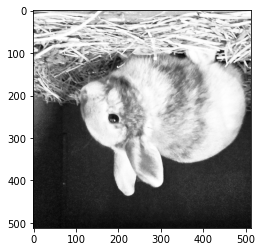

In [43]:
# Affichage de l'image : variable A en niveaux de gris
fig, ax = plt.subplots()
ax.imshow(A, cmap="Greys_r")


# Transformation 3 - rotation de 180°

# Construction d'une matrice M4 à partir de la matrice d'origine A
# M4 de même taille que A pour commencer, et ne contenant que des zéros
M4 = np.zeros_like(A)

#Inversé le matrice de A selon les lignes
#Equation sur les lignes
for j in range(n):
    M4[j,:]=A[n-1-j,:]
# Affichage de l'image correspondant à la matrice M4     

fig, ax = plt.subplots()
ax.imshow(M4, cmap="Greys_r")

# Construction d'une matrice M5 à partir de la matrice d'origine M4
# M5 de même taille que M4 pour commencer, et ne contenant que des zéros
M5 = np.zeros_like(M4)
# Manipulation sur M4 pour construire M5
for j in range(n):
    M5[:,j]=M4[:,n-1-j]
# Affichage de l'image correspondant à la matrice M5     
fig, ax = plt.subplots()
ax.imshow(M5, cmap="Greys_r")

Etape 2


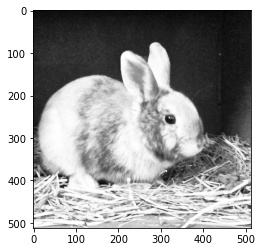

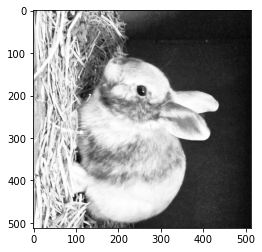

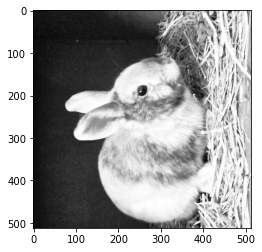

In [42]:
#Transformation 4 - Rotation de 270°

# Affichage de l'image : variable A en niveaux de gris
fig, ax = plt.subplots()
ax.imshow(A, cmap="Greys_r")

# Transposé du matrice de rotation de 180° 

M6 = M5.T
fig, ax = plt.subplots()
ax.imshow(M6, cmap="Greys_r")

#Rotate Matrice M6 selon les lignes

# Construction d'une matrice M7 à partir de la matrice d'origine M6
# M7 de même taille que M6 pour commencer, et ne contenant que des zéros
M7 = np.zeros_like(M6)
# Manipulation sur A pour construire M1
for j in range(n):
    M7[:,j]=M6[:,n-1-j]
# Affichage de l'image correspondant à la matrice M1     
fig, ax = plt.subplots()
ax.imshow(M7, cmap="Greys_r")

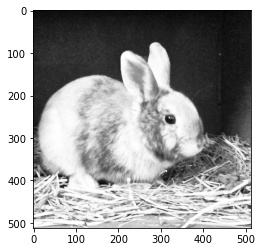

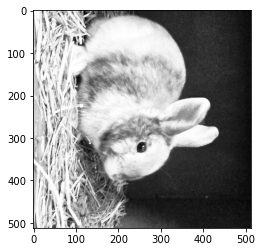

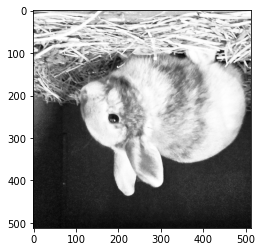

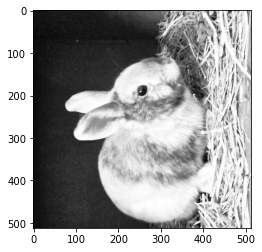

In [41]:
#Travail total:

# Affichage de l'image : variable A en niveaux de gris
fig, ax = plt.subplots()
ax.imshow(A, cmap="Greys_r")

# Transformation 2 - Rotation de 90° 
M2 = A.T

M3 = np.zeros_like(M2)
# Manipulation sur A pour construire M1
for j in range(n):
    M3[:,j]=M2[:,n-1-j]
# Affichage de l'image correspondant à la matrice M1     
fig, ax = plt.subplots()
ax.imshow(M3, cmap="Greys_r")

#Transformation 3 - Rotation de 180°

# Construction d'une matrice M5 à partir de la matrice d'origine M4
# M5 de même taille que M4 pour commencer, et ne contenant que des zéros
M5 = np.zeros_like(M4)
# Manipulation sur M4 pour construire M5
for j in range(n):
    M5[:,j]=M4[:,n-1-j]
# Affichage de l'image correspondant à la matrice M5     
fig, ax = plt.subplots()
ax.imshow(M5, cmap="Greys_r")

#Transformation 4 - Rotation de 270°

# Construction d'une matrice M7 à partir de la matrice d'origine M6
# M7 de même taille que M6 pour commencer, et ne contenant que des zéros
M7 = np.zeros_like(M6)
# Manipulation sur A pour construire M1
for j in range(n):
    M7[:,j]=M6[:,n-1-j]
# Affichage de l'image correspondant à la matrice M1     
fig, ax = plt.subplots()
ax.imshow(M7, cmap="Greys_r")

# 2 - Matrices et systèmes linéaires
Nous nous proposons d'étudier la qualité de la résolution numérique en python du système linéaire $H_{(n)} X=Y\,,$ système de $n$ équations à $n$ inconnues, dans lequel
- $X$ est le vecteur inconnu que l'on cherche à déterminer numériquement
- $Y$ est le vecteur second membre, donné
- la matrice du système $H_{(n)}$ est la matrice de Hilbert d'ordre $n$ dont les coefficients sont définis par :
$$
H_{(n)}(i,j)={1\over i+j-1},\;\;1\le i,j\le n.
$$

## 2.1 - Pour comprendre avec le cas $n = 4$
Commençons avec un exemple où le système linéaire est un système à 4 équations et 4 inconnues, dont la matrice est la matrice de Hilbert d'ordre $n=4$:
$$
\displaystyle 
H_{(4)}=\left(
\begin{array}{cccc}
1 & 1/2 & 1/3 & 1/4\\
1/2 & 1/3 & 1/4 & 1/5\\
1/3 & 1/4 & 1/5 & 1/6\\
1/4 & 1/5 & 1/6 & 1/7\\
\end{array}
\right)
$$

On souhaite donc tester la résolution numérique en python du système $$H_{(4)} X=Y$$

Tester une méthode numérique veut dire créer un cas test dans lequel on connait la solution (que nous appelerons "solution exacte") et vérifier que la solution calculée numériquement (que nous appelerons "solution approchée") correspond bien à la solution exacte. Si c'est bien le cas, le test est concluant et le calcul numérique valable. Si les résultats sont différents, alors il y a un problème...

Nous allons donc construire un tel cas test en prenant un second membre $Y$ qui correspond à un vecteur $X$ connu.

Nous choisissons de prendre le vecteur
$
\displaystyle 
X_{exact}=\left(
\begin{array}{c}
1\\
1\\
1\\    
1
\end{array}
\right)
$.
Pour ce vecteur $X=X_{exact}$ donné, on calcule le vecteur second membre défini par $Y = H_{(4)} X_{exact}$

Ainsi, par construction, on s'attend à ce que le vecteur $X_{approché}$ solution du sytème $H_{(4)} X = Y$ calculée numériquement donne la même chose que $X_{exact}$ (si la solution est unique...). C'est ce que nous allons tester ci-dessous.

In [44]:
# Construction coefficients par coefficients de la matrice de Hilbert 4 x 4 (aussi dite d'ordre 4)
# REMARQUE :
# Ce jeu sur les indices est pour permettre de bien avoir un tableau python
# dont les indices commencent à 0
# et dont les coefficients sont données par l'expression théorique en fonction de i et j 
H=np.zeros((4,4))
for i_python in range(4):
    for j_python in range(4):
        i_matrice = i_python + 1
        j_matrice = j_python + 1  
        H[i_python,j_python]=1./(i_matrice+j_matrice-1)
# Construction du vecteur qui défini la solution exacte 
X_exact=np.ones(4)
# Construction du vecteur second membre correspondant 
Y = H@X_exact
# Calcul de la solution numérique dite "approchée" du système
X_approche = np.linalg.solve(H, Y)

In [45]:
# VERIFICATIONS 
print("La solution calculée numériquement en python est {}".format(X_approche))
print("La solution exacte est {}".format(X_exact))
# Calcul du vecteur d'erreur contenant les écarts entre les composantes de ces vecteurs
Vecteur_erreur = X_exact - X_approche
print("Le vecteur d'erreurs correspondant est {}".format(Vecteur_erreur))
# Vérification que la matrice est bien inversible (système avec une solution unique)
print("Le déterminant de la matrice du système est det(H) = {}".format(np.linalg.det(H)))

La solution calculée numériquement en python est [1. 1. 1. 1.]
La solution exacte est [1. 1. 1. 1.]
Le vecteur d'erreurs correspondant est [-1.55431223e-15  2.53130850e-14 -6.55031585e-14  4.37427872e-14]
Le déterminant de la matrice du système est det(H) = 1.6534391534390412e-07


In [ ]:
#determinant tres pres de 0

##### Premières conclusions sur le test 
On peut donc dire que le test semble concluant car les solutions exacte $X_{exact}$ et approchée $X_{approché}$ sont très proches l'une de l'autre (elles semblent même égales). On peut aussi regarder leur écart, c'est à dire les erreurs entre leurs composantes via le vecteur d'erreurs: ces erreurs sont très petites (très proches de 0).

On peut aussi remarquer que la valeur du déterminant de la matrice du système est non-nulle et qu'il y a donc une solution unique au système. Cette valeur est cependant proche de zéro...

##### Représentations graphiques des résultats du tests

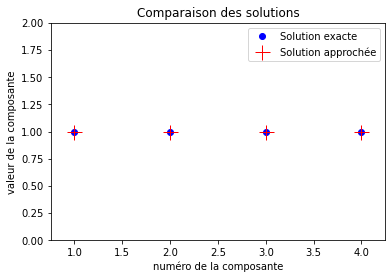

In [49]:
premiere_composante = 1
derniere_composante = 4
numero_composante = np.linspace(premiere_composante,derniere_composante,derniere_composante)

plt.plot(numero_composante,X_exact, 'bo', label='Solution exacte')
plt.plot(numero_composante,X_approche, 'r+', markersize = 15, label='Solution approchée')
plt.xlim(premiere_composante - 0.25, derniere_composante + 0.25)
plt.ylim(np.min(X_approche)-1,np.max(X_approche)+1)
plt.legend()
plt.title('Comparaison des solutions')
plt.xlabel('numéro de la composante')
plt.ylabel('valeur de la composante')
plt.show()

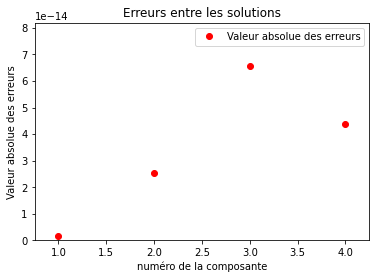

In [47]:
plt.plot(numero_composante,np.abs(Vecteur_erreur), 'ro', label='Valeur absolue des erreurs')
plt.xlim(premiere_composante - 0.25, derniere_composante + 0.25)
plt.ylim(0,1.25*np.max(np.abs(Vecteur_erreur)))
plt.legend()
plt.title('Erreurs entre les solutions')
plt.xlabel('numéro de la composante')
plt.ylabel('Valeur absolue des erreurs')
plt.show()

##### Différents types d'erreurs

Il existe plusieurs manières d'évaluer des erreurs; L'utilisation de ces différents types d'erreur dépend le plus souvent de ce que l'on cherche à évaluer. On peut ainsi définir, sans être exhaustif, des erreurs relatives ou absolues, des erreurs moyennes ou maximales, comme proposé ci-dessous.

Les valeurs calculées ci-dessous permettent dans notre cas de dire que le test est bien concluant pour $n=4$ car toutes ces erreurs sont très faibles.

In [50]:
# Calcul de l'erreur absolue moyenne 
erreur_absolue_moyenne = np.mean(np.abs(Vecteur_erreur))
print("Erreur absolue moyenne = {}".format(erreur_absolue_moyenne))
# Calcul de l'erreur absolue maximale 
erreur_absolue_max = np.linalg.norm(Vecteur_erreur,np.inf)
print("Erreur absolue maximale = {}".format(erreur_absolue_max))
# Calcul de l'erreur relative moyenne 
erreur_relative_moyenne = np.mean(np.abs(Vecteur_erreur/X_exact))
print("Erreur relative moyenne (en pourcentage) = {} %".format(100*erreur_relative_moyenne))
# Calcul de l'erreur relative maximale 
erreur_relative_max = np.linalg.norm(Vecteur_erreur/X_exact,np.inf)
print("Erreur relative maximale (en pourcentage) = {} %".format(100*erreur_relative_max))

Erreur absolue moyenne = 3.402833570476105e-14
Erreur absolue maximale = 6.550315845288424e-14
Erreur relative moyenne (en pourcentage) = 3.4028335704761048e-12 %
Erreur relative maximale (en pourcentage) = 6.5503158452884236e-12 %


## 2.2 - EXERCICE - A vous de faire avec le cas $n = 12$
##### Refaire le test proposé à la section 2.1 pour un système de 12 équations à 12 inconnues
##### Représenter graphiquement les solutions et les erreurs
##### Conclure sur les résultats du test pour $n=12$

In [52]:
#Systèmes de 12 équations à 12 inconnues

# Ce jeu sur les indices est pour permettre de bien avoir un tableau python
# dont les indices commencent à 0
# et dont les coefficients sont données par l'expression théorique en fonction de i et j 
H=np.zeros((12,12))
for i_python in range(12):
    for j_python in range(12):
        i_matrice = i_python + 1
        j_matrice = j_python + 1  
        H[i_python,j_python]=1./(i_matrice+j_matrice-1)
# Construction du vecteur qui défini la solution exacte 
X_exact=np.ones(12)
# Construction du vecteur second membre correspondant 
Y = H@X_exact
# Calcul de la solution numérique dite "approchée" du système
X_approche = np.linalg.solve(H, Y)

#print(H)


[[1.         0.5        0.33333333 0.25       0.2        0.16666667
  0.14285714 0.125      0.11111111 0.1        0.09090909 0.08333333]
 [0.5        0.33333333 0.25       0.2        0.16666667 0.14285714
  0.125      0.11111111 0.1        0.09090909 0.08333333 0.07692308]
 [0.33333333 0.25       0.2        0.16666667 0.14285714 0.125
  0.11111111 0.1        0.09090909 0.08333333 0.07692308 0.07142857]
 [0.25       0.2        0.16666667 0.14285714 0.125      0.11111111
  0.1        0.09090909 0.08333333 0.07692308 0.07142857 0.06666667]
 [0.2        0.16666667 0.14285714 0.125      0.11111111 0.1
  0.09090909 0.08333333 0.07692308 0.07142857 0.06666667 0.0625    ]
 [0.16666667 0.14285714 0.125      0.11111111 0.1        0.09090909
  0.08333333 0.07692308 0.07142857 0.06666667 0.0625     0.05882353]
 [0.14285714 0.125      0.11111111 0.1        0.09090909 0.08333333
  0.07692308 0.07142857 0.06666667 0.0625     0.05882353 0.05555556]
 [0.125      0.11111111 0.1        0.09090909 0.08333

In [53]:
# VERIFICATIONS 
print("La solution calculée numériquement en python est {}".format(X_approche))
print("La solution exacte est {}".format(X_exact))
# Calcul du vecteur d'erreur contenant les écarts entre les composantes de ces vecteurs
Vecteur_erreur = X_exact - X_approche
print("Le vecteur d'erreurs correspondant est {}".format(Vecteur_erreur))
# Vérification que la matrice est bien inversible (système avec une solution unique)
print("Le déterminant de la matrice du système est det(H) = {}".format(np.linalg.det(H)))

La solution calculée numériquement en python est [0.99999993 1.00000869 0.99972767 1.00369897 0.97296008 1.11850084
 0.67060622 1.5949503  0.30389297 1.5088705  0.78878985 1.03799403]
La solution exacte est [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Le vecteur d'erreurs correspondant est [ 6.88220918e-08 -8.68936687e-06  2.72331854e-04 -3.69896858e-03
  2.70399227e-02 -1.18500838e-01  3.29393777e-01 -5.94950295e-01
  6.96107034e-01 -5.08870503e-01  2.11210150e-01 -3.79940337e-02]
Le déterminant de la matrice du système est det(H) = 2.5505547367892783e-78


In [ ]:
# Le déterminant est extrement proche de 0

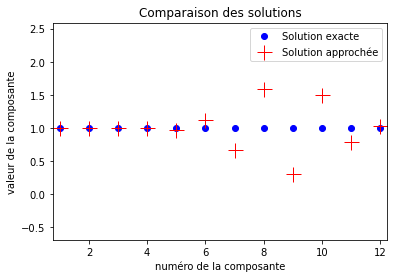

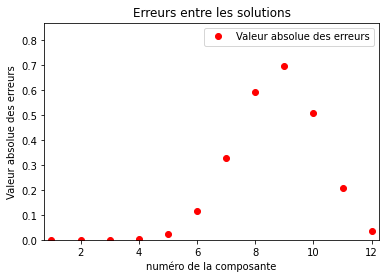

In [55]:
# Representations Graphiques

premiere_composante = 1
derniere_composante = 12
numero_composante = np.linspace(premiere_composante,derniere_composante,derniere_composante)

plt.plot(numero_composante,X_exact, 'bo', label='Solution exacte')
plt.plot(numero_composante,X_approche, 'r+', markersize = 15, label='Solution approchée')
plt.xlim(premiere_composante - 0.25, derniere_composante + 0.25)
plt.ylim(np.min(X_approche)-1,np.max(X_approche)+1)
plt.legend()
plt.title('Comparaison des solutions')
plt.xlabel('numéro de la composante')
plt.ylabel('valeur de la composante')
plt.show()

#Erreurs

plt.plot(numero_composante,np.abs(Vecteur_erreur), 'ro', label='Valeur absolue des erreurs')
plt.xlim(premiere_composante - 0.25, derniere_composante + 0.25)
plt.ylim(0,1.25*np.max(np.abs(Vecteur_erreur)))
plt.legend()
plt.title('Erreurs entre les solutions')
plt.xlabel('numéro de la composante')
plt.ylabel('Valeur absolue des erreurs')
plt.show()

#Erreur dépend de l'algorythme mais comment on connait pas ce qu'il y a dans l'algorythme on ne sais pas plus as to how its calculates
#since we dont nkow how its calculated we cant know if the resultats are right or not.

#This is to show that not all resolutions de systèmes actuammy work

## 2.3 - EXERCICE - Pour aller plus loin 

##### Vous finirez cette partie chez vous si vous n'avez pas le temps durant la  séance.

##### Pour les valeurs de n = 4, 8, 12, 16, 32 et 64 
 - construire la matrice de Hilbert d'ordre n
 - calculer le déterminant de la matrice de Hilbert d'ordre n
 - construire le second membre $Y$ du système tel que la solution exacte du système soit $X=[1;1;...;1]$
 - calculer numériquement la solution approchée 
 - déterminer le pourcentage d'erreur maximale de la solution approchée par rapport à la solution exacte

##### Résumer les résultats de la question précédente dans un tableau à partir duquel vous tracerez un graphique pour présenter les résultats et expliquer vos conclusions

In [65]:
#N = 4

# Construction coefficients par coefficients de la matrice de Hilbert 4 x 4 (aussi dite d'ordre 4)
# REMARQUE :
# Ce jeu sur les indices est pour permettre de bien avoir un tableau python
# dont les indices commencent à 0
# et dont les coefficients sont données par l'expression théorique en fonction de i et j 
H4=np.zeros((4,4))
for i_python in range(4):
    for j_python in range(4):
        i_matrice = i_python + 1
        j_matrice = j_python + 1  
        H4[i_python,j_python]=1./(i_matrice+j_matrice-1)
# Construction du vecteur qui défini la solution exacte 
X_exact=np.ones(4)
# Construction du vecteur second membre correspondant 
Y = H4@X_exact
# Calcul de la solution numérique dite "approchée" du système
X_approche = np.linalg.solve(H4, Y)
#print(H4)

# VERIFICATIONS 
print("La solution calculée numériquement en python est {}".format(X_approche))
print("La solution exacte est {}".format(X_exact))
# Calcul du vecteur d'erreur contenant les écarts entre les composantes de ces vecteurs
Vecteur_erreur = X_exact - X_approche
print("Le vecteur d'erreurs correspondant est {}".format(Vecteur_erreur))
# Vérification que la matrice est bien inversible (système avec une solution unique)
print("Le déterminant de la matrice du système est det(H) = {}".format(np.linalg.det(H4)))

[[1.         0.5        0.33333333 0.25      ]
 [0.5        0.33333333 0.25       0.2       ]
 [0.33333333 0.25       0.2        0.16666667]
 [0.25       0.2        0.16666667 0.14285714]]
La solution calculée numériquement en python est [1. 1. 1. 1.]
La solution exacte est [1. 1. 1. 1.]
Le vecteur d'erreurs correspondant est [-1.55431223e-15  2.53130850e-14 -6.55031585e-14  4.37427872e-14]
Le déterminant de la matrice du système est det(H) = 1.6534391534390412e-07


In [68]:
#N = 8

# Construction coefficients par coefficients de la matrice de Hilbert 4 x 4 (aussi dite d'ordre 4)
# REMARQUE :
# Ce jeu sur les indices est pour permettre de bien avoir un tableau python
# dont les indices commencent à 0
# et dont les coefficients sont données par l'expression théorique en fonction de i et j 
H8=np.zeros((8,8))
for i_python in range(8):
    for j_python in range(8):
        i_matrice = i_python + 1
        j_matrice = j_python + 1  
        H8[i_python,j_python]=1./(i_matrice+j_matrice-1)
# Construction du vecteur qui défini la solution exacte 
X_exact=np.ones(8)
# Construction du vecteur second membre correspondant 
Y = H8@X_exact
# Calcul de la solution numérique dite "approchée" du système
X_approche = np.linalg.solve(H8, Y)
#print(H8)

# VERIFICATIONS 
print("La solution calculée numériquement en python est {}".format(X_approche))
print("La solution exacte est {}".format(X_exact))
# Calcul du vecteur d'erreur contenant les écarts entre les composantes de ces vecteurs
Vecteur_erreur = X_exact - X_approche
print("Le vecteur d'erreurs correspondant est {}".format(Vecteur_erreur))
# Vérification que la matrice est bien inversible (système avec une solution unique)
print("Le déterminant de la matrice du système est det(H) = {}".format(np.linalg.det(H8)))

La solution calculée numériquement en python est [1.         1.         1.00000001 0.99999997 1.00000008 0.99999988
 1.00000008 0.99999998]
La solution exacte est [1. 1. 1. 1. 1. 1. 1. 1.]
Le vecteur d'erreurs correspondant est [-7.72248931e-12  4.27104019e-10 -5.66825187e-09  3.09636674e-08
 -8.38486485e-08  1.19096559e-07 -8.49763917e-08  2.40196738e-08]
Le déterminant de la matrice du système est det(H) = 2.7370500086739613e-33


In [67]:
#N = 12

# Ce jeu sur les indices est pour permettre de bien avoir un tableau python
# dont les indices commencent à 0
# et dont les coefficients sont données par l'expression théorique en fonction de i et j 
H12=np.zeros((12,12))
for i_python in range(12):
    for j_python in range(12):
        i_matrice = i_python + 1
        j_matrice = j_python + 1  
        H12[i_python,j_python]=1./(i_matrice+j_matrice-1)
# Construction du vecteur qui défini la solution exacte 
X_exact=np.ones(12)
# Construction du vecteur second membre correspondant 
Y = H12@X_exact
# Calcul de la solution numérique dite "approchée" du système
X_approche = np.linalg.solve(H12, Y)

#print(H12)

# VERIFICATIONS 
print("La solution calculée numériquement en python est {}".format(X_approche))
print("La solution exacte est {}".format(X_exact))
# Calcul du vecteur d'erreur contenant les écarts entre les composantes de ces vecteurs
Vecteur_erreur = X_exact - X_approche
print("Le vecteur d'erreurs correspondant est {}".format(Vecteur_erreur))
# Vérification que la matrice est bien inversible (système avec une solution unique)
print("Le déterminant de la matrice du système est det(H) = {}".format(np.linalg.det(H12)))

La solution calculée numériquement en python est [0.99999993 1.00000869 0.99972767 1.00369897 0.97296008 1.11850084
 0.67060622 1.5949503  0.30389297 1.5088705  0.78878985 1.03799403]
La solution exacte est [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Le vecteur d'erreurs correspondant est [ 6.88220918e-08 -8.68936687e-06  2.72331854e-04 -3.69896858e-03
  2.70399227e-02 -1.18500838e-01  3.29393777e-01 -5.94950295e-01
  6.96107034e-01 -5.08870503e-01  2.11210150e-01 -3.79940337e-02]
Le déterminant de la matrice du système est det(H) = 2.5505547367892783e-78


In [69]:
#N = 16

# Ce jeu sur les indices est pour permettre de bien avoir un tableau python
# dont les indices commencent à 0
# et dont les coefficients sont données par l'expression théorique en fonction de i et j 
H16=np.zeros((16,16))
for i_python in range(16):
    for j_python in range(16):
        i_matrice = i_python + 1
        j_matrice = j_python + 1  
        H16[i_python,j_python]=1./(i_matrice+j_matrice-1)
# Construction du vecteur qui défini la solution exacte 
X_exact=np.ones(16)
# Construction du vecteur second membre correspondant 
Y = H16@X_exact
# Calcul de la solution numérique dite "approchée" du système
X_approche = np.linalg.solve(H16, Y)

#print(H16)

# VERIFICATIONS 
print("La solution calculée numériquement en python est {}".format(X_approche))
print("La solution exacte est {}".format(X_exact))
# Calcul du vecteur d'erreur contenant les écarts entre les composantes de ces vecteurs
Vecteur_erreur = X_exact - X_approche
print("Le vecteur d'erreurs correspondant est {}".format(Vecteur_erreur))
# Vérification que la matrice est bien inversible (système avec une solution unique)
print("Le déterminant de la matrice du système est det(H) = {}".format(np.linalg.det(H16)))

La solution calculée numériquement en python est [ 1.00000014  0.99997846  1.00080627  0.98702734  1.11074575  0.44908841
  2.63124804 -1.63068927  1.97310817  5.76810913 -9.15743681  9.78095684
 -1.20209903 -1.03281616  2.71556927  0.6064034 ]
La solution exacte est [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Le vecteur d'erreurs correspondant est [-1.42146081e-07  2.15449090e-05 -8.06271351e-04  1.29726554e-02
 -1.10745755e-01  5.50911590e-01 -1.63124804e+00  2.63068927e+00
 -9.73108170e-01 -4.76810913e+00  1.01574368e+01 -8.78095684e+00
  2.20209903e+00  2.03281616e+00 -1.71556927e+00  3.93596600e-01]
Le déterminant de la matrice du système est det(H) = 5.926327736317881e-136


In [70]:
#N = 32

# Ce jeu sur les indices est pour permettre de bien avoir un tableau python
# dont les indices commencent à 0
# et dont les coefficients sont données par l'expression théorique en fonction de i et j 
H32=np.zeros((32,32))
for i_python in range(32):
    for j_python in range(32):
        i_matrice = i_python + 1
        j_matrice = j_python + 1  
        H32[i_python,j_python]=1./(i_matrice+j_matrice-1)
# Construction du vecteur qui défini la solution exacte 
X_exact=np.ones(32)
# Construction du vecteur second membre correspondant 
Y = H32@X_exact
# Calcul de la solution numérique dite "approchée" du système
X_approche = np.linalg.solve(H32, Y)

#print(H32)

# VERIFICATIONS 
print("La solution calculée numériquement en python est {}".format(X_approche))
print("La solution exacte est {}".format(X_exact))
# Calcul du vecteur d'erreur contenant les écarts entre les composantes de ces vecteurs
Vecteur_erreur = X_exact - X_approche
print("Le vecteur d'erreurs correspondant est {}".format(Vecteur_erreur))
# Vérification que la matrice est bien inversible (système avec une solution unique)
print("Le déterminant de la matrice du système est det(H) = {}".format(np.linalg.det(H32)))

La solution calculée numériquement en python est [  1.00000034   0.99994649   1.00207145   0.96658612   1.27077245
  -0.14782568   3.12295581   2.44321299 -13.45967113  27.25215024
 -17.95920757   7.31420553  -3.25198447 -14.84938774  41.11225425
 -20.16182232   5.49387944  -3.61716437 -17.06992482  18.54244528
 -11.4688755   17.290113    31.66179764 -22.97350703 -31.60425973
   4.28412533  22.80676536 -11.00151149  35.33016304 -25.89278249
  -3.64712197   7.21160223]
La solution exacte est [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]
Le vecteur d'erreurs correspondant est [-3.35388858e-07  5.35061177e-05 -2.07145439e-03  3.34138842e-02
 -2.70772450e-01  1.14782568e+00 -2.12295581e+00 -1.44321299e+00
  1.44596711e+01 -2.62521502e+01  1.89592076e+01 -6.31420553e+00
  4.25198447e+00  1.58493877e+01 -4.01122543e+01  2.11618223e+01
 -4.49387944e+00  4.61716437e+00  1.80699248e+01 -1.75424453e+01
  1.24688755e+01 -1.62901130e+01 -3.06617

In [72]:
#N = 64

# Ce jeu sur les indices est pour permettre de bien avoir un tableau python
# dont les indices commencent à 0
# et dont les coefficients sont données par l'expression théorique en fonction de i et j 
H64=np.zeros((64,64))
for i_python in range(64):
    for j_python in range(64):
        i_matrice = i_python + 1
        j_matrice = j_python + 1  
        H64[i_python,j_python]=1./(i_matrice+j_matrice-1)
# Construction du vecteur qui défini la solution exacte 
X_exact=np.ones(64)
# Construction du vecteur second membre correspondant 
Y = H64@X_exact
# Calcul de la solution numérique dite "approchée" du système
X_approche = np.linalg.solve(H64, Y)

#print(H64)

# VERIFICATIONS 
print("La solution calculée numériquement en python est {}".format(X_approche))
print("La solution exacte est {}".format(X_exact))
# Calcul du vecteur d'erreur contenant les écarts entre les composantes de ces vecteurs
Vecteur_erreur = X_exact - X_approche
print("Le vecteur d'erreurs correspondant est {}".format(Vecteur_erreur))
# Vérification que la matrice est bien inversible (système avec une solution unique)
print("Le déterminant de la matrice du système est det(H) = {}".format(np.linalg.det(H64)))

La solution calculée numériquement en python est [  1.00000023   0.99996597   1.00119518   0.98340581   1.10393109
   0.76845876   0.44214976   5.21057367  -7.60778368   8.05278702
  -7.53692827  29.30242142 -28.89340844 -11.94171332  20.38068562
  32.29739273 -43.0095336   12.43911495  29.92256026 -29.60200798
  -7.91536244  -6.63201339  -4.26272143  55.00984878  -3.41494486
 -10.95449935 -22.12044436  34.10256866 -27.63039588  11.00363183
 -23.74025677  13.03954216   8.50195142   8.18716389 -10.24421759
  30.74222459 -62.33047425   6.02992349  76.0402408   -9.44042456
  17.35105579 -65.00643731  62.85001056 -41.77412484   0.21574194
 -32.78390371   6.87794154 -19.12232205  30.16192268  24.51813445
   8.69800663  -4.58883401  33.97146943  10.96519149 -41.91401324
  -0.1293975   16.3359687  -30.21132542   7.24985331 -45.01779353
  33.94057027  11.31964346  51.17022987 -40.36219726]
La solution exacte est [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1.

La solution calculée numériquement en python est [1. 1. 1. 1.]
La solution exacte est [1. 1. 1. 1.]
Le vecteur d'erreurs correspondant est [-1.55431223e-15  2.53130850e-14 -6.55031585e-14  4.37427872e-14]
Le déterminant de la matrice du système est det(H) = 1.6534391534390412e-07
La solution calculée numériquement en python est [1.         1.         1.00000001 0.99999997 1.00000008 0.99999988
 1.00000008 0.99999998]
La solution exacte est [1. 1. 1. 1. 1. 1. 1. 1.]
Le vecteur d'erreurs correspondant est [-7.72248931e-12  4.27104019e-10 -5.66825187e-09  3.09636674e-08
 -8.38486485e-08  1.19096559e-07 -8.49763917e-08  2.40196738e-08]
Le déterminant de la matrice du système est det(H) = 2.7370500086739613e-33
La solution calculée numériquement en python est [0.99999993 1.00000869 0.99972767 1.00369897 0.97296008 1.11850084
 0.67060622 1.5949503  0.30389297 1.5088705  0.78878985 1.03799403]
La solution exacte est [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Le vecteur d'erreurs correspondant est 

ValueError: x and y must have same first dimension, but have shapes (6,) and (64,)

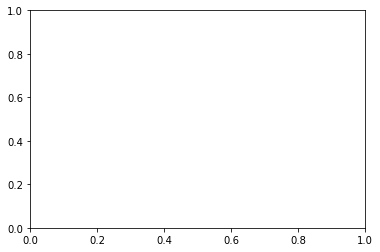

In [81]:
#N = 4

# Construction coefficients par coefficients de la matrice de Hilbert 4 x 4 (aussi dite d'ordre 4)
# REMARQUE :
# Ce jeu sur les indices est pour permettre de bien avoir un tableau python
# dont les indices commencent à 0
# et dont les coefficients sont données par l'expression théorique en fonction de i et j 
H4=np.zeros((4,4))
for i_python in range(4):
    for j_python in range(4):
        i_matrice = i_python + 1
        j_matrice = j_python + 1  
        H4[i_python,j_python]=1./(i_matrice+j_matrice-1)
# Construction du vecteur qui défini la solution exacte 
X_exact=np.ones(4)
# Construction du vecteur second membre correspondant 
Y = H4@X_exact
# Calcul de la solution numérique dite "approchée" du système
X_approche = np.linalg.solve(H4, Y)
#print(H4)

# VERIFICATIONS 
print("La solution calculée numériquement en python est {}".format(X_approche))
print("La solution exacte est {}".format(X_exact))
# Calcul du vecteur d'erreur contenant les écarts entre les composantes de ces vecteurs
Vecteur_erreur = X_exact - X_approche
print("Le vecteur d'erreurs correspondant est {}".format(Vecteur_erreur))
# Vérification que la matrice est bien inversible (système avec une solution unique)
print("Le déterminant de la matrice du système est det(H) = {}".format(np.linalg.det(H4)))



#N = 8

# Construction coefficients par coefficients de la matrice de Hilbert 4 x 4 (aussi dite d'ordre 4)
# REMARQUE :
# Ce jeu sur les indices est pour permettre de bien avoir un tableau python
# dont les indices commencent à 0
# et dont les coefficients sont données par l'expression théorique en fonction de i et j 
H8=np.zeros((8,8))
for i_python in range(8):
    for j_python in range(8):
        i_matrice = i_python + 1
        j_matrice = j_python + 1  
        H8[i_python,j_python]=1./(i_matrice+j_matrice-1)
# Construction du vecteur qui défini la solution exacte 
X_exact=np.ones(8)
# Construction du vecteur second membre correspondant 
Y = H8@X_exact
# Calcul de la solution numérique dite "approchée" du système
X_approche = np.linalg.solve(H8, Y)
#print(H8)

# VERIFICATIONS 
print("La solution calculée numériquement en python est {}".format(X_approche))
print("La solution exacte est {}".format(X_exact))
# Calcul du vecteur d'erreur contenant les écarts entre les composantes de ces vecteurs
Vecteur_erreur = X_exact - X_approche
print("Le vecteur d'erreurs correspondant est {}".format(Vecteur_erreur))
# Vérification que la matrice est bien inversible (système avec une solution unique)
print("Le déterminant de la matrice du système est det(H) = {}".format(np.linalg.det(H8)))


#N = 12

# Ce jeu sur les indices est pour permettre de bien avoir un tableau python
# dont les indices commencent à 0
# et dont les coefficients sont données par l'expression théorique en fonction de i et j 
H12=np.zeros((12,12))
for i_python in range(12):
    for j_python in range(12):
        i_matrice = i_python + 1
        j_matrice = j_python + 1  
        H12[i_python,j_python]=1./(i_matrice+j_matrice-1)
# Construction du vecteur qui défini la solution exacte 
X_exact=np.ones(12)
# Construction du vecteur second membre correspondant 
Y = H12@X_exact
# Calcul de la solution numérique dite "approchée" du système
X_approche = np.linalg.solve(H12, Y)

#print(H12)

# VERIFICATIONS 
print("La solution calculée numériquement en python est {}".format(X_approche))
print("La solution exacte est {}".format(X_exact))
# Calcul du vecteur d'erreur contenant les écarts entre les composantes de ces vecteurs
Vecteur_erreur = X_exact - X_approche
print("Le vecteur d'erreurs correspondant est {}".format(Vecteur_erreur))
# Vérification que la matrice est bien inversible (système avec une solution unique)
print("Le déterminant de la matrice du système est det(H) = {}".format(np.linalg.det(H12)))



#N = 16

# Ce jeu sur les indices est pour permettre de bien avoir un tableau python
# dont les indices commencent à 0
# et dont les coefficients sont données par l'expression théorique en fonction de i et j 
H16=np.zeros((16,16))
for i_python in range(16):
    for j_python in range(16):
        i_matrice = i_python + 1
        j_matrice = j_python + 1  
        H16[i_python,j_python]=1./(i_matrice+j_matrice-1)
# Construction du vecteur qui défini la solution exacte 
X_exact=np.ones(16)
# Construction du vecteur second membre correspondant 
Y = H16@X_exact
# Calcul de la solution numérique dite "approchée" du système
X_approche = np.linalg.solve(H16, Y)

#print(H16)

# VERIFICATIONS 
print("La solution calculée numériquement en python est {}".format(X_approche))
print("La solution exacte est {}".format(X_exact))
# Calcul du vecteur d'erreur contenant les écarts entre les composantes de ces vecteurs
Vecteur_erreur = X_exact - X_approche
print("Le vecteur d'erreurs correspondant est {}".format(Vecteur_erreur))
# Vérification que la matrice est bien inversible (système avec une solution unique)
print("Le déterminant de la matrice du système est det(H) = {}".format(np.linalg.det(H16)))



#N = 32

# Ce jeu sur les indices est pour permettre de bien avoir un tableau python
# dont les indices commencent à 0
# et dont les coefficients sont données par l'expression théorique en fonction de i et j 
H32=np.zeros((32,32))
for i_python in range(32):
    for j_python in range(32):
        i_matrice = i_python + 1
        j_matrice = j_python + 1  
        H32[i_python,j_python]=1./(i_matrice+j_matrice-1)
# Construction du vecteur qui défini la solution exacte 
X_exact=np.ones(32)
# Construction du vecteur second membre correspondant 
Y = H32@X_exact
# Calcul de la solution numérique dite "approchée" du système
X_approche = np.linalg.solve(H32, Y)

#print(H32)

# VERIFICATIONS 
print("La solution calculée numériquement en python est {}".format(X_approche))
print("La solution exacte est {}".format(X_exact))
# Calcul du vecteur d'erreur contenant les écarts entre les composantes de ces vecteurs
Vecteur_erreur = X_exact - X_approche
print("Le vecteur d'erreurs correspondant est {}".format(Vecteur_erreur))
# Vérification que la matrice est bien inversible (système avec une solution unique)
print("Le déterminant de la matrice du système est det(H) = {}".format(np.linalg.det(H32)))



#N = 64

# Ce jeu sur les indices est pour permettre de bien avoir un tableau python
# dont les indices commencent à 0
# et dont les coefficients sont données par l'expression théorique en fonction de i et j 
H64=np.zeros((64,64))
for i_python in range(64):
    for j_python in range(64):
        i_matrice = i_python + 1
        j_matrice = j_python + 1  
        H64[i_python,j_python]=1./(i_matrice+j_matrice-1)
# Construction du vecteur qui défini la solution exacte 
X_exact=np.ones(64)
# Construction du vecteur second membre correspondant 
Y = H64@X_exact
# Calcul de la solution numérique dite "approchée" du système
X_approche = np.linalg.solve(H64, Y)

#print(H64)

# VERIFICATIONS 
print("La solution calculée numériquement en python est {}".format(X_approche))
print("La solution exacte est {}".format(X_exact))

# Calcul du vecteur d'erreur contenant les écarts entre les composantes de ces vecteurs
Vecteur_erreur = X_exact - X_approche
print("Le vecteur d'erreurs correspondant est {}".format(Vecteur_erreur))
# Vérification que la matrice est bien inversible (système avec une solution unique)
print("Le déterminant de la matrice du système est det(H) = {}".format(np.linalg.det(H64)))




#Pourcentage d'erreur maximale


#15 = number of points or segments
x = (4, 8, 12, 16, 32, 64)

y = Vecteur_erreur

#tracé
plt.plot(x,y, "m-o", linewidth=2, label="Courbe 1")

#avec une legende
plt.legend()
plt.title ("Fonction f(x)")
plt.xlabel("abscisses x")
plt.ylabel("ordonnées y")
plt.axis("equal")


4
La solution calculée numériquement en python est [1. 1. 1. 1.]
La solution exacte est [1. 1. 1. 1.]
Le vecteur d'erreurs correspondant est [-1.55431223e-15  2.53130850e-14 -6.55031585e-14  4.37427872e-14]
Le déterminant de la matrice du système est det(H) = 1.6534391534390412e-07
8
La solution calculée numériquement en python est [1.         1.         1.00000001 0.99999997 1.00000008 0.99999988
 1.00000008 0.99999998]
La solution exacte est [1. 1. 1. 1. 1. 1. 1. 1.]
Le vecteur d'erreurs correspondant est [-7.72248931e-12  4.27104019e-10 -5.66825187e-09  3.09636674e-08
 -8.38486485e-08  1.19096559e-07 -8.49763917e-08  2.40196738e-08]
Le déterminant de la matrice du système est det(H) = 2.7370500086739613e-33
12
La solution calculée numériquement en python est [0.99999993 1.00000869 0.99972767 1.00369897 0.97296008 1.11850084
 0.67060622 1.5949503  0.30389297 1.5088705  0.78878985 1.03799403]
La solution exacte est [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Le vecteur d'erreurs corresponda

ValueError: x and y must have same first dimension, but have shapes (1,) and (64,)

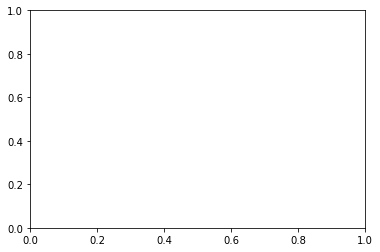

In [100]:
# Use a for boucle to not have to copy and paste

# Ce jeu sur les indices est pour permettre de bien avoir un tableau python
# dont les indices commencent à 0
# et dont les coefficients sont données par l'expression théorique en fonction de i et j 

vectN = np.array([4, 8, 12, 16, 32, 64])
for N in vectN: 
    print(N)
    H=np.zeros((N,N))
    for i_python in range(N):
        for j_python in range(N):
            i_matrice = i_python + 1
            j_matrice = j_python + 1  
            H[i_python,j_python]=1./(i_matrice+j_matrice-1)
    # Construction du vecteur qui défini la solution exacte 
    X_exact=np.ones(N)
    # Construction du vecteur second membre correspondant 
    Y = H@X_exact
    # Calcul de la solution numérique dite "approchée" du système
    X_approche = np.linalg.solve(H, Y)

    #print(H)

# VERIFICATIONS 
    print("La solution calculée numériquement en python est {}".format(X_approche))
    print("La solution exacte est {}".format(X_exact))

# Calcul du vecteur d'erreur contenant les écarts entre les composantes de ces vecteurs
    Vecteur_erreur = X_exact - X_approche
    print("Le vecteur d'erreurs correspondant est {}".format(Vecteur_erreur))
# Vérification que la matrice est bien inversible (système avec une solution unique)
    print("Le déterminant de la matrice du système est det(H) = {}".format(np.linalg.det(H)))

    #Representation Graphique
#15 = number of points or segments
x = vectN
y = Vecteur_erreur

#tracé
plt.plot(x,y, 'bo', linewidth=2, label="Courbe 1")

#avec une legende
plt.legend()
plt.title ("Fonction f(x)")
plt.xlabel("abscisses x")
plt.ylabel("ordonnées y")
plt.axis("equal")


In [98]:
range(np.size(N))

range(0, 6)